# Derivative Free-Gaussian Mixture Variational Inference (DF-GMVI)
This notebook is a brief introduction to the DF-GMVI algorithm proposed in the paper ["Stable Derivative Free Gaussian Mixture Variational Inference for Bayesian Inverse Problems"]().

##  Natural Gradient Variational Inference
Consider a posterior distribution $\rho_{\text{post}}(\theta)\propto \exp(-\Phi_R(\theta))$, where $\Phi_R(\theta)=\frac{1}{2}\mathcal{F}(\theta)^T\mathcal{F}(\theta)$, and a variational family of densities $\{ \rho_a \}$ parameterized by $a$. To minimize the KL divergence $\text{KL}(\rho_a||\rho_{\text{post}})$ over the variational family, we introduce a general metric $\langle\cdot, \mathfrak{M}(a) \cdot \rangle$, and the steepest descent direction becomes
$$ -\mathfrak{M}(a)^{-1}\nabla_a  \text{KL}[a \Vert \rho_{\text{post}}] = \argmin_\sigma \frac{\langle \nabla_a \text{KL}[\rho_{a} \Vert \rho_{\text{post}}] ,  \sigma\rangle}{\sqrt{\langle \sigma,  \mathfrak{M}(a) \sigma \rangle}}.$$
Now we focuses on the Fisher-Rao metric, where the metric tensor is the Fisher information matrix
$$\mathfrak{M}(a) = \mathrm{FIM} (a):= \int  \frac{\partial \log \rho_{a}(\theta)}{\partial a} \frac{\partial \log \rho_{a}(\theta)}{\partial a}^T \rho_a(\theta) \,\mathrm{d} \theta.$$
This gives rise to the concept of natural gradient descent or natural variational inference, which corresponds to the following gradient flow: 
$$  \frac{\mathrm{d} a}{\mathrm{d} t} = -\mathrm{FIM}(a)^{-1}\nabla_a  \mathrm{KL}[\rho_a \Vert \rho_ {\text{post}}]. $$
### Gaussian Approximation
For Gaussian distribution family $rho_a(\theta)=\mathcal{N}(\theta; m, C)$, where $a=[m,C]$, the Fisher information matrix is given by
$$ \mathrm{FIM}(a) = \begin{bmatrix} C^{-1} & \\ & X \end{bmatrix}$$
where $X$ is a 4-th order tensor satisfying $X Y = \frac{1}{4}C^{-1} (Y + Y^T) C^{-1}$ for all $ Y \in \R^{N_{\theta}\times N_{\theta}}$.
This gives the gradient flow 
$$ \dot  m_t = - C_t\mathbb{E}_{\rho_{a_t}}[\nabla \Phi_R ], \qquad
\dot  C_t = C_t - C_t \mathbb{E}_{\rho_{a_t}}[\nabla^2  \Phi_R ]C_t $$.
### Gaussian Mixture Approximation
For Gaussian mixture distribution family 
$$\rho_a^\mathrm{GM}(\theta) = \sum_{k=1}^{K} w_k \mathcal{N}(\theta; m_k, C_k)$$ 
where $a=[m_1, ..., m_k, ..., m_K, C_1. ..., C_k, ..., C_K, w_1, ..., w_k, ..., w_K]$. 

Considering the contrained optimization problem 
$$\argmin_\sigma \frac{\langle \nabla_a \text{KL}[\rho_{a} \Vert \rho_{\text{post}}] ,  \sigma\rangle}{\sqrt{\langle \sigma,  \mathrm{FIM}(a) \sigma \rangle}},\quad s.t. \sum_{k=1}^{K} \sigma_{ \dot{w}_k }=0,$$
its KKT conditions lead to the following natural gradient flow: 
$$
\begin{bmatrix} \dot{m}_{k} \\ \dot{C}_{k} \\ \dot{w}_{k}  \end{bmatrix}
  =-(\mathrm{FIM}(a))^{-1}
  \begin{bmatrix}
  w_k\int \mathcal{N}_k(\theta) \Bigl( \nabla_{\theta} \log\rho_a^\mathrm{GM}  +\nabla_{\theta} \Phi_R \Bigr)  \,\mathrm{d}\theta
  \\
  \frac{w_k}{2}\int \mathcal{N}_k(\theta) \Bigl(\nabla_{\theta}\nabla_{\theta}\log \rho_a^\mathrm{GM}  + \nabla_{\theta}\nabla_{\theta}\Phi_R\Bigr) \,\mathrm{d}\theta
  \\
  \int \mathcal{N}_k(\theta)
  \bigl(
  \log \rho_a^\mathrm{GM} + \Phi_R 
  \bigr) \,\mathrm{d}\theta  + \lambda
  \end{bmatrix}.
$$
where $\mathcal{N}_k(\theta)=\mathcal{N}(\theta;m_k, C_k)$ and $\lambda$ is a Lagrangian multiplier determined by the constraint $\sum_{k=1}^{K} \dot{w}_k =0$.

We approximate the Fisher information matrix by
$$ \mathrm{FIM}(a) \approx \textrm{diag}\left(w_1 C_1^{-1}, ..., w_k C_k^{-1}, ..., w_K C_K^{-1}, w_1X_1, ..., w_kX_k, ..., w_KX_K, \frac{1}{w_1}, ..., \frac{1}{w_k}, ..., \frac{1}{w_K}\right),$$
where $X_k$ is a 4-th order tensor satisfying $X_k Y = \frac{1}{4}C_k^{-1} (Y + Y^T) C_k^{-1}$ for all $ Y \in \R^{N_{\theta}\times N_{\theta}}$.

Finally, we get the following equations:
$$ \begin{aligned}  
\frac{\,\mathrm{d} m_k}{\,\mathrm{d} t} &= -C_k\int \mathcal{N}_k(\theta) \Bigl( \nabla_{\theta} \log\rho_a^{\rm GM}  +  \nabla_{\theta} \Phi_R \Bigr)  \,\mathrm{d}\theta, \\
\frac{\,\mathrm{d} C_{k}^{-1}}{\,\mathrm{d} t} &=   \int \mathcal{N}_k(\theta) \bigl(\nabla_{\theta}\nabla_{\theta}\log \rho_a^{\rm GM}  + \nabla_{\theta}\nabla_{\theta}\Phi_R\bigr) \,\mathrm{d}\theta,\qquad (1)  \\
\frac{\,\mathrm{d} \log w_{k}}{\,\mathrm{d} t} &= -\int \Bigl(\mathcal{N}_k(\theta) -  \rho_a^{\rm GM}\Bigr)\bigl(\log \rho_a^{\rm GM}  + \Phi_R \bigr) \,\mathrm{d}\theta.
\end{aligned}
$$

##  Derivative Free Gaussian Mixture Variational Inference
We introduce a stable, derivative free approximation of (1) by the following quadrature rules.

### Quadrature rule to compute $\mathbb{E}_\mathcal{N}[\Phi_R],\mathbb{E}_{\mathcal{N}}[\nabla_{\theta}\Phi_R],\mathbb{E}_{\mathcal{N}}[\nabla_{\theta}\nabla_{\theta}\Phi_R]$
Given a Gaussian density $\mathcal{N}(\theta)=\mathcal{N}(\theta;m,C)$, and a hyperparameter $\alpha>0$, we first generate $2N_{\theta}+1$ quadrature points
$$ \theta_0=m,\ \theta_i=m+\alpha [\sqrt{C}]_i,\ \theta_{N_\theta+i}=m-\alpha [\sqrt{C}]_i \ (1\leq i \leq N_\theta) $$
and then define vectors 
$$ c = \mathcal{F}(\theta_0), \ b_i = \frac{\mathcal{F}(\theta_i) - \mathcal{F}(\theta_{N_\theta + i})}{2\alpha}, \
    a_i = \frac{\mathcal{F}(\theta_i) + \mathcal{F}(\theta_{N_\theta + i}) - 2\mathcal{F}(\theta_0)}{2\alpha^2} \ (1 \leq i \leq N_\theta), $$
and denote $B=[b_1,b_2,\dots,b_{N_\theta}],\,A=[a_1,a_2,\dots,a_{N_\theta}]$.

We approximate the expectation of the function, the gradient, the Hessian as
$$\begin{aligned}
    \mathbb{E}_{\mathcal{N}}[\Phi_R ]  & \approx \frac{1}{2}  c^Tc, \\
    \mathbb{E}_{\mathcal{N}}[\nabla_\theta   \Phi_R ]  & \approx \sqrt{C}^{-T}  B^Tc, \\
    \mathbb{E}_{\mathcal{N}}[\nabla_\theta \nabla_\theta  \Phi_R ]  & \approx \sqrt{C}^{-T}(6\mathrm{Diag}(A^TA) + B^T B)\sqrt{C}^{-1}.
\end{aligned}$$

### Quadrature rule to compute $\mathbb{E}_{\mathcal{N}_k}[\log\rho_a^{\rm GM}(\theta)],\mathbb{E}_{\mathcal{N}_k}[\nabla_\theta \log\rho_a^{\rm GM}(\theta)],\mathbb{E}_{\mathcal{N}_k}[\nabla_\theta\nabla_\theta\log\rho_a^{\rm GM}(\theta)]$
For the expecation of $\log\rho_a^{\rm GM}(\theta)$ and its gradient, we use mean-point approximation:
$$ \begin{aligned}
    \mathbb{E}_{\mathcal{N}_k}[\log\rho_a^{\rm GM}(\theta)]  \approx & \log\rho_a^{\rm GM}(m_k) \\
    \mathbb{E}_{\nabla_\theta\mathcal{N}_k}[\log\rho_a^{\rm GM}(\theta)] \approx & \nabla_\theta \log\rho_a^{\rm GM}(m_k).
\end{aligned}
$$
The expectation of the Hessian is approximated as 
$$
    \mathbb{E}_{\nabla_\theta\nabla_\theta\mathcal{N}_k}[\log\rho_a^{\rm GM}(\theta)] \approx
    -C_k^{-1} + \frac{\sum_{i<j} w_iw_j \bigl(v_i(m_k) - v_j(m_k)\bigr)\bigl(v_i(m_k) - v_j(m_k)\bigr)^T\mathcal{N}_i(m_k)\mathcal{N}_j(m_k)}{ \rho_a^{\rm GM}(m_k)^2}.
$$
where $v_i(\theta) = C_i^{-1}(\theta - m_i)$.


Finally, we update the covariances, means, and weights sequentially using a forward Euler scheme as follows:
$$\begin{aligned}
C_{k}^{-1}(t+\Delta t) 
        &= C_{k}^{-1}(t)  + \Delta t ~ \mathrm{\mathsf{QR}}_{\N_k(t)}\bigl\{\nabla_{\theta}\nabla_{\theta}\log \rho_a^{\rm GM}(t) + \nabla_{\theta}\nabla_{\theta}\Phi_R\bigr\},
        \\
        m_{k}(t+\Delta t) 
        &= m_{k}(t)  - \Delta t ~ C_k(t+\Delta t) ~ \mathrm{\mathsf{QR}}_{\N_k(t)} \bigl\{\nabla_{\theta} \log\rho_a^{\rm GM}(t)  +  \nabla_{\theta} \Phi_R \bigr\}, \qquad(2)
        \\
        \log w_{k}(t+\Delta t) &= \log w_{k}(t) - \Delta t ~ \mathrm{\mathsf{QR}}_{\N_k(t)} \bigl\{\log \rho_a^{\rm GM}(t)  + \Phi_R \bigr\}. 

\end{aligned}
$$
where $QR\{\cdot\}$ represents quadrature rules above. We then normalize $w_k(t + ∆t)_{k=1}^k$ and, for efficiency, set a lower bound of $w_k$ at a default value of $10^{−8}$ during normalization.


##  Theoretical Analysis
There are two theoretical properties of the natural gradient flow defined by (1) and the proposed DF-GMVI algorithm described in (2).
* For the DF-GMVI algorithm described in (2), if $0 < \Delta t < 1$, then $C_k$ remains positive definite. 
* Affine invariance (consider an affine mapping $\varphi: \theta \to T\theta+b$ below)
    * The natural gradient flow defined by (1) is affine invariant for any invertible matrix $T$.
    * The proposed DF-GMVI algorithm described in (2) is affine invariant for any invertible lower triangular matrix $T$, when using Cholesky decomposition to compute the square root matrix $\sqrt{C}$.

##  2D Numercial Example
In this part, we apply the DF-GMVI algorithm to approximate the distribution that follows the Rosenbrock function, which has a character
istic “banana” shape. That is, the posterior $\rho_{\text{post}}(\theta)\propto \exp(-\frac{1}{2}\mathcal{F}(\theta)^T\mathcal{F}(\theta))$, with 
$$ 
\mathcal{F}(\theta) = 
\frac{1}{\sqrt{10}}\Bigl(y - \begin{bmatrix}
10(\theta_{(2)} -  \theta_{(1)}^2)\\
\theta_{(1)}
\end{bmatrix}\Bigr)
\quad \textrm{ and }\quad 
y= 
\begin{bmatrix}
0\\
1
\end{bmatrix}.
$$
We apply DF-GMVI with $K = 10,20$, and $40$ modes, each randomly initialized as $\mathcal{N}(0,I)$ with equal weights. We set the hyperparameter $\alpha=10^{-3}$, the step size $\Delta t=0.5$. We run the algorithm for 200 iterations. The density estimations at the 200th iteration and the errors in terms of total variation over the iterations are shown in the following pictures.

In [3]:
using Random
using Distributions
using LinearAlgebra
using ForwardDiff
include("../Inversion/Plot.jl")
include("../Inversion/DF_GMVI.jl")
include("../Derivative-Free-Variational-Inference/MultiModal.jl")
Random.seed!(111);

[ Info: ("iter = ", 20, " / ", 200)
[ Info: ("iter = ", 40, " / ", 200)
[ Info: ("iter = ", 60, " / ", 200)
[ Info: ("iter = ", 80, " / ", 200)
[ Info: ("iter = ", 100, " / ", 200)
[ Info: ("iter = ", 120, " / ", 200)
[ Info: ("iter = ", 140, " / ", 200)
[ Info: ("iter = ", 160, " / ", 200)
[ Info: ("iter = ", 180, " / ", 200)
[ Info: ("iter = ", 200, " / ", 200)
[ Info: ("iter = ", 20, " / ", 200)
[ Info: ("iter = ", 40, " / ", 200)
[ Info: ("iter = ", 60, " / ", 200)
[ Info: ("iter = ", 80, " / ", 200)
[ Info: ("iter = ", 100, " / ", 200)
[ Info: ("iter = ", 120, " / ", 200)
[ Info: ("iter = ", 140, " / ", 200)
[ Info: ("iter = ", 160, " / ", 200)
[ Info: ("iter = ", 180, " / ", 200)
[ Info: ("iter = ", 200, " / ", 200)
[ Info: ("iter = ", 20, " / ", 200)
[ Info: ("iter = ", 40, " / ", 200)
[ Info: ("iter = ", 60, " / ", 200)
[ Info: ("iter = ", 80, " / ", 200)
[ Info: ("iter = ", 100, " / ", 200)
[ Info: ("iter = ", 120, " / ", 200)
[ Info: ("iter = ", 140, " / ", 200)
[ Info: ("ite

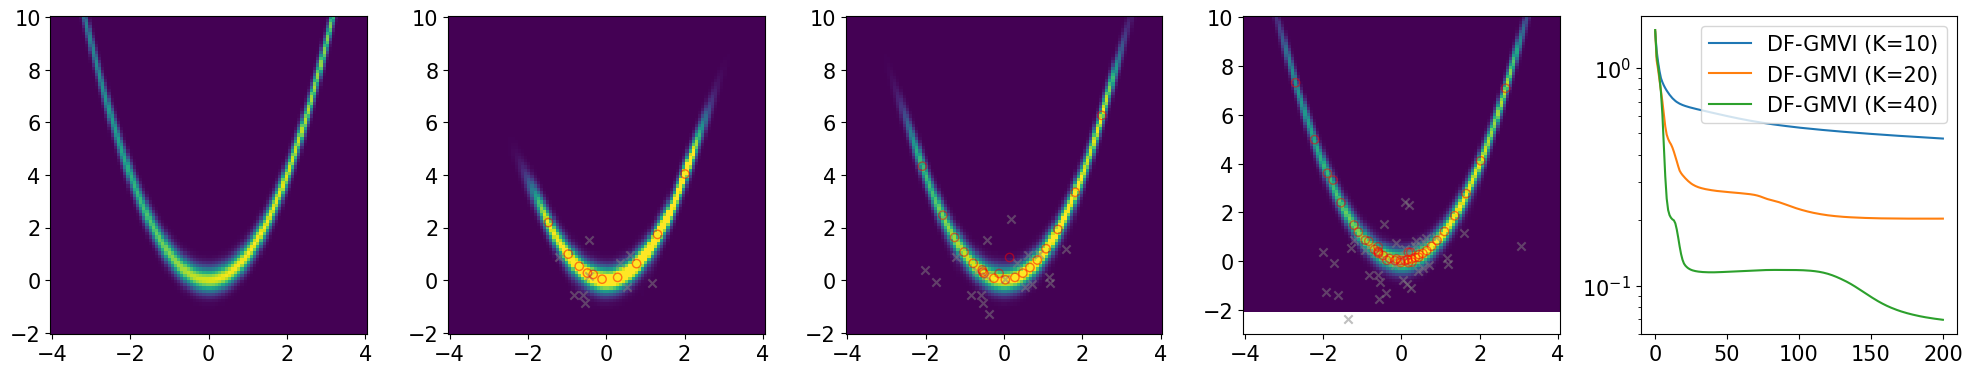

In [4]:
function func_F(x)
    F1 = 0-10*(x[2]-x[1]^2)
    F2 = 1-x[1]
    return [F1,F2]/sqrt(10)
end

N_modes_array = [10; 20; 40]

fig, ax = PyPlot.subplots(nrows=1, ncols=length(N_modes_array)+2, sharex=false, sharey=false, figsize=(20,4))


N_modes = N_modes_array[end]
x0_w  = ones(N_modes)/N_modes
μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
N_x = length(μ0)
x0_mean, xx0_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_x)
for im = 1:N_modes
    x0_mean[im, :]    .= rand(MvNormal(zeros(N_x), Σ0)) + μ0
    xx0_cov[im, :, :] .= Σ0
end


N_iter = 200
Nx, Ny = 100,100
dt = 5e-1

μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
objs = [Gaussian_mixture_VI(nothing, func_F, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt)[1] 
        for N_modes in N_modes_array]
visualization_2d(ax ; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-2.0, 10.0], func_F=func_F, objs=objs,label="DF-GMVI")

fig.tight_layout()
# fig.savefig("DF-GMVI-2D-Example.pdf")